<a href="https://www.kaggle.com/code/hatemamine/ledgar-scotusgenerdatasetfortrainsiamesebert?scriptVersionId=114631267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas
import numpy as np 
import matplotlib.pyplot as plt
import cv2
#get the train dataset
df = pandas.read_csv("/kaggle/input/v2-scotuslexglue-preprocesslongtextwithkeybert/SCOTUStrainKeyBERT.csv")
print(len(df))
print(df.head())

5000
   Unnamed: 0                                             ATexte  MotsCles
0           0   refinery regulatory interstate pipe dakota ra...         7
1           1   patent halliburtons industry appliance batche...         7
2           2   courtpetitioners mormon petitions fundamental...         0
3           3   reservation ratifiedpending annulled seized j...         1
4           4   securities subholding holdingcompany affirmed...         7


In [2]:
#get the train dataset
dfv = pandas.read_csv("/kaggle/input/v2-scotuslexglue-preprocesslongtextwithkeybert/SCOTUSvalidationKeyBERT.csv")
print(len(dfv))
print(dfv.head())

1400
   Unnamed: 0                                             ATexte  MotsCles
0           0   felonyviolates probation missouri offensesmos...         0
1           1   tennessee taxationexcept federal taxable exem...         7
2           2   securities plaintiffs defrauded filed federal...         7
3           3   gas federal amended utilitys contracts intras...         7
4           4   arrest intoxicated amendment revoke drivingwh...         0


In [3]:
frames = [df, dfv]
df = pandas.concat(frames, ignore_index=True)
df =df.reset_index(drop=True)
print(len(df))
print(df.head())

6400
   Unnamed: 0                                             ATexte  MotsCles
0           0   refinery regulatory interstate pipe dakota ra...         7
1           1   patent halliburtons industry appliance batche...         7
2           2   courtpetitioners mormon petitions fundamental...         0
3           3   reservation ratifiedpending annulled seized j...         1
4           4   securities subholding holdingcompany affirmed...         7


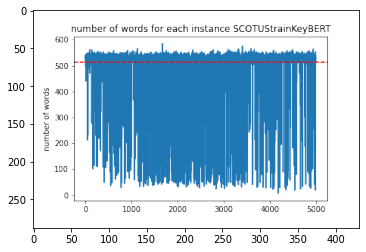

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/kaggle/input/v2-scotuslexglue-preprocesslongtextwithkeybert/SCOTUStrainKeyBERT.png'))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


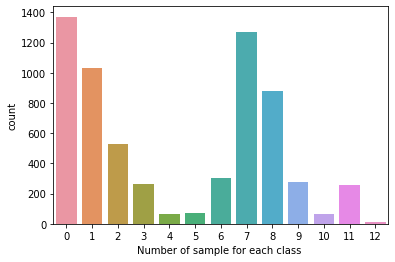

In [5]:
import matplotlib
import seaborn as sb 
sb.countplot(df.MotsCles)
matplotlib.pyplot.xlabel("Number of sample for each class ")
matplotlib.pyplot.savefig('scotusclassdistribution.png')

In [6]:
df.head()

,Unnamed: 0,ATexte,MotsCles
0,0,refinery regulatory interstate pipe dakota ra...,7
1,1,patent halliburtons industry appliance batche...,7
2,2,courtpetitioners mormon petitions fundamental...,0
3,3,reservation ratifiedpending annulled seized j...,1
4,4,securities subholding holdingcompany affirmed...,7


In [7]:
import random
random.seed(1)
text1=[]
text2=[]
correlated=[]
labels=[]

for i in range (len(df)):
    row0 =df.iloc[i]
    # we exclud label 0 and 1 from the generated dataset for training 
    if row0["MotsCles"]==0 or row0["MotsCles"]==1:continue
    x=0
    y=0
    while x < 10 :
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        # we exclud label 0 and 1 from the generated dataset for training
        row =df.iloc[ind]
        if row0["MotsCles"]==row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(1)
            labels.append(str(row0["MotsCles"])+"=="+str(row["MotsCles"]))
            x=x+1
            
        
    while y < 10:
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        row =df.iloc[ind]
        if row0["MotsCles"]!=row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(0)
            labels.append(str(row0["MotsCles"])+"!="+str(row["MotsCles"]))
            y=y+1
    #break



In [8]:
import pandas 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
#get the train dataset
df = pandas.read_csv("/kaggle/input/ledgarlexglue-preprocesslongtextwithkeyber/LEDGARtrainKeyBERT.csv")
print(len(df))
print(df.head())

60000
   Unnamed: 0                                             ATexte  MotsCles
0           0   nonpayment maturity notice debenture presentm...        97
1           1   erisa liability events affiliate adverse obli...        39
2           2   amendment constitute signature instrument fac...        26
3           3   deeds behalf privileges authority property as...        45
4           4   payroll salary compensation payments employme...        11


In [9]:
#get the train dataset
dfv = pandas.read_csv("/kaggle/input/ledgarlexglue-preprocesslongtextwithkeyber/LEDGARvalidationKeyBERT.csv")
print(len(dfv))
print(dfv.head())

10000
   Unnamed: 0                                             ATexte  MotsCles
0           0   amended agreement discretion document adverse...         2
1           1   agreements amended agreement superseded confi...         2
2           2   texas validity state federal courts laws enfo...        47
3           3   sectionheadings amendment constitute convenie...        48
4           4   construed amendment accordance california int...        47


In [10]:
frames = [df, dfv]
df = pandas.concat(frames, ignore_index=True)
df =df.reset_index(drop=True)
print(len(df))
print(df.head())

70000
   Unnamed: 0                                             ATexte  MotsCles
0           0   nonpayment maturity notice debenture presentm...        97
1           1   erisa liability events affiliate adverse obli...        39
2           2   amendment constitute signature instrument fac...        26
3           3   deeds behalf privileges authority property as...        45
4           4   payroll salary compensation payments employme...        11


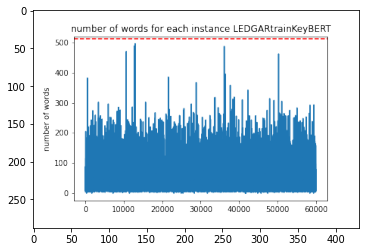

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/kaggle/input/ledgarlexglue-preprocesslongtextwithkeyber/LEDGARtrainKeyBERT.png'))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


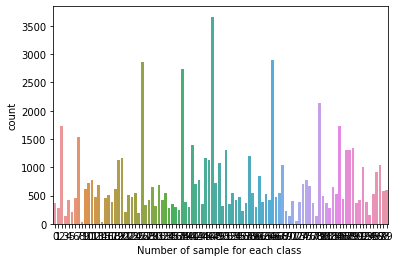

In [12]:
import matplotlib
import seaborn as sb 
sb.countplot(df.MotsCles)
matplotlib.pyplot.xlabel("Number of sample for each class ")
matplotlib.pyplot.savefig('ledgarclassdistribution.png')

In [13]:
for i in range (len(df)):
    row0 =df.iloc[i]
    # we exclud label 0 and 1 from the generated dataset for training 
    if row0["MotsCles"]==0 or row0["MotsCles"]==1:continue
    x=0
    y=0
    while x < 10 :
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        # we exclud label 0 and 1 from the generated dataset for training
        row =df.iloc[ind]
        if row0["MotsCles"]==row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(1)
            labels.append(str(row0["MotsCles"])+"=="+str(row["MotsCles"]))
            x=x+1
            
        
    while y < 10:
        ind = random.randint(0, len(df)-1)
        if i ==ind : continue
        row =df.iloc[ind]
        if row0["MotsCles"]!=row["MotsCles"]:
            text1.append(row0["ATexte"])
            text2.append(row["ATexte"])
            correlated.append(0)
            labels.append(str(row0["MotsCles"])+"!="+str(row["MotsCles"]))
            y=y+1
    #break

In [14]:
dict = {'ATexte':text1 , 'MotsCles':text2, 'correlated':correlated, 'labels':labels } 
df7 = pandas.DataFrame(dict)              
print(len(df7))
print(df7.head(2))

1467040
                                              ATexte  \
0   refinery regulatory interstate pipe dakota ra...   
1   refinery regulatory interstate pipe dakota ra...   

                                            MotsCles  correlated labels  
0   contractor pursuant enforce federal payable m...           1   7==7  
1   capabilityheld regulatory statutes bpt epa su...           1   7==7  


In [15]:
!pip install sentence-transformers --quiet
train, validate = np.split(df7.sample(frac=1, random_state=42),[int(.9*len(df7))])
#print(len(df7))
#print(len(train))
#print(len(validate))
#print(train.head())
from sentence_transformers import InputExample
dev_samples=[]
train_samples=[]
for i in range(len(train)):
        row =train.iloc[i]
        # two input text and the target (1=similarity, 0=disimilarity)
        train_samples.append(InputExample(texts=[row["ATexte"], row["MotsCles"]], label=float(row["correlated"])))
        #break
for i in range(len(validate)):
        row =validate.iloc[i]
        dev_samples.append(InputExample(texts=[row["ATexte"], row["MotsCles"]], label=float(row["correlated"])))
        #break
#print(train_samples[:10])

In [16]:
# save the generated dataset in a pickle file 
import pickle
import torch
lexgluescotus = {'train_samples':train_samples, 'dev_samples':dev_samples}
with open('/kaggle/working/lexgluescotus&ledgarFSL01_31keybert.pickle', 'wb') as handle:
    pickle.dump(lexgluescotus, handle, protocol=pickle.HIGHEST_PROTOCOL)